In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


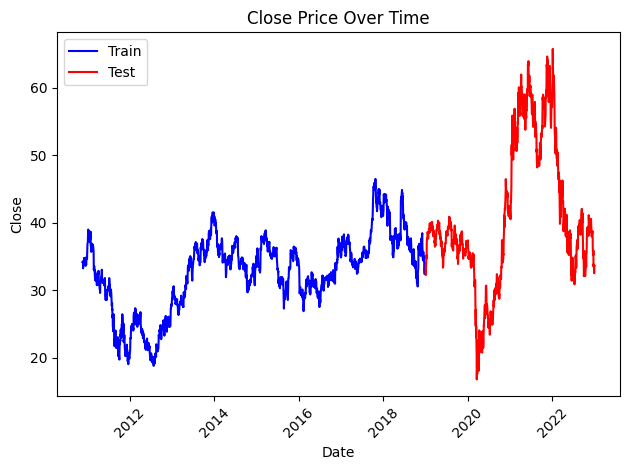

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 5.547495070625388  Average Fitness = 1.5845704610280231
Generation 2: Best fitness = 6.893843534330205  Average Fitness = 2.5076966098348015
Generation 3: Best fitness = 6.893843534330205  Average Fitness = 3.1403411090341
Generation 4: Best fitness = 6.893843534330205  Average Fitness = 3.6716771701549002
Generation 5: Best fitness = 6.893843534330205  Average Fitness = 3.778430809831425
Generation 6: Best fitness = 8.142044390605719  Average Fitness = 4.345836202017511
Generation 7: Best fitness = 8.142044390605719  Average Fitness = 4.645644254134973
Generation 8: Best fitness = 8.142044390605719  Average Fitness = 4.989571040612423
Generation 9: Best fitness = 8.174952437000798  Average Fitness = 5.178043296837947
Generation 10: Best fitness = 8.33703005432222  Average Fitness = 5.467234069939154
Generation 11: Best fitness = 8.351112474523493  Average Fitness = 5.609079641943621
Generation 12: Best fitness = 8.351432744900716  Average Fitn

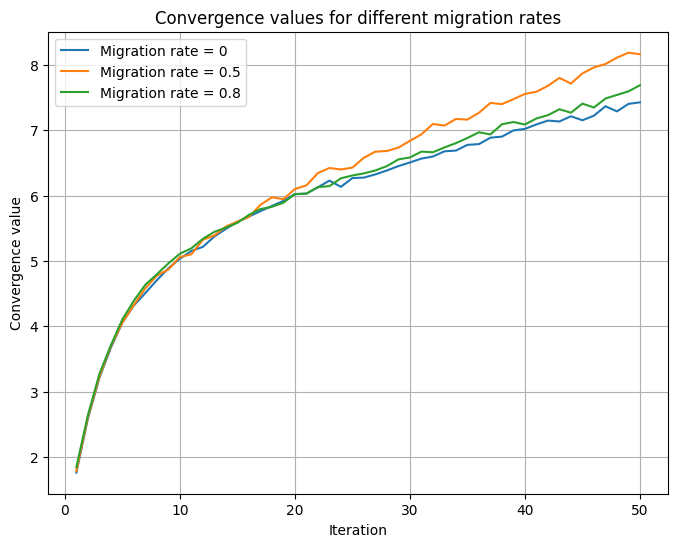

In [3]:
# ring
values = []
migration_rates = [0, 0.5 , 0.8]
num_runs = 20
convergence_values = []
for i in migration_rates:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 5,num_iter=50,n_migrants_rate=i,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="ring")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 51), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.grid(True) 
plt.show()

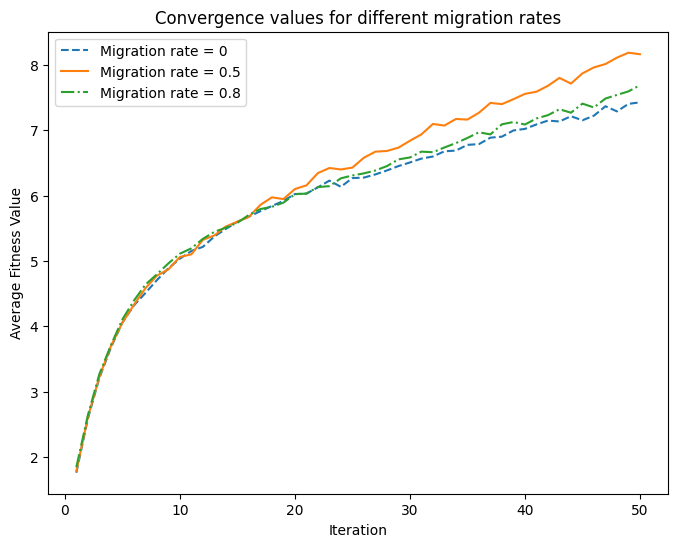

In [14]:
import matplotlib.pyplot as plt

line_styles = {
    0.0: "--",            # Migration rate 0.0 with circle markers
    0.5: "-",            # Migration rate 0.5 with "x" markers
    0.8: "-.",            # Migration rate 0.8 with square markers
}

plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    migration_rate = migration_rates[i]
    if migration_rate in line_styles:
        plt.plot(np.arange(1, 51), convergence_values[i], label=f'Migration rate = {migration_rate}', linestyle=line_styles[migration_rate])

plt.xlabel('Iteration')
plt.ylabel('Average Fitness Value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()


In [14]:
# multikuti

values = []
migration_rates = [0, 0.5 , 0.8]
num_runs = 20
convergence_values = []
for i in migration_rates:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 5,num_iter=50,n_migrants_rate=i,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="multikuti")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

file_name = 'migration_rate_multikuti'
np.save(file_name,convergence_values)
line_styles = {
    0.0: "--",            # Migration rate 0.0 with circle markers
    0.5: "-",            # Migration rate 0.5 with "x" markers
    0.8: "-.",            # Migration rate 0.8 with square markers
}

plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    migration_rate = migration_rates[i]
    if migration_rate in line_styles:
        plt.plot(np.arange(1, 51), convergence_values[i], label=f'Migration rate = {migration_rate}', linestyle=line_styles[migration_rate])

plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()

Running multikuti
Generation 1: Best fitness = 7.768321705210496  Average Fitness = 1.5962581336804524
Generation 2: Best fitness = 8.046466639996403  Average Fitness = 2.3846052658316736
Generation 3: Best fitness = 8.046466639996403  Average Fitness = 3.0948401089358137
Generation 4: Best fitness = 8.056900289742895  Average Fitness = 3.691982978390958
Generation 5: Best fitness = 8.056900289742895  Average Fitness = 3.990629233992589
Generation 6: Best fitness = 8.056900289742895  Average Fitness = 4.248608309302642
Generation 7: Best fitness = 8.056900289742895  Average Fitness = 4.645872116581822


KeyboardInterrupt: 

In [9]:
from scipy import stats

# Compare the convergence metrics of the two algorithms
t_statistic, p_value = stats.ttest_ind(convergence_values[0], convergence_values[2])

# Print the results
if p_value < 0.05:
    print("The difference in convergence is statistically significant.")
else:
    print("The difference in convergence is not statistically significant.")
print(p_value)


The difference in convergence is not statistically significant.
0.06040014422699678


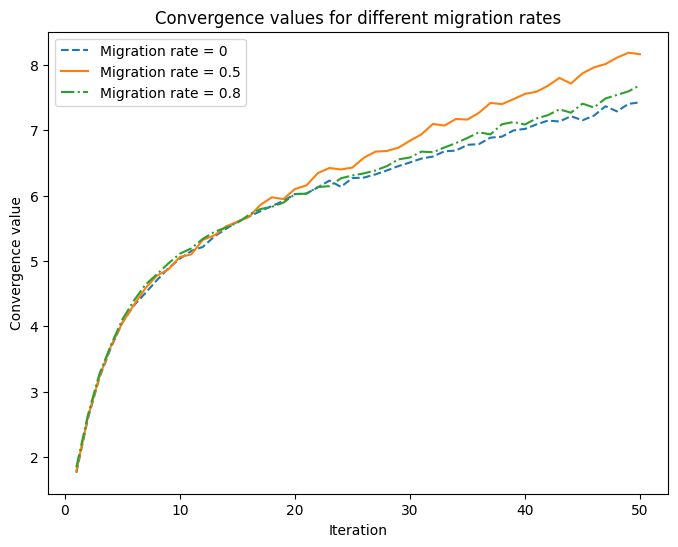

In [17]:
file_name = "migration_rate_ring.npy"
m = np.load(file_name)


line_styles = {
    0.0: "--",            # Migration rate 0.0 with circle markers
    0.5: "-",            # Migration rate 0.5 with "x" markers
    0.8: "-.",            # Migration rate 0.8 with square markers
}

plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    migration_rate = migration_rates[i]
    if migration_rate in line_styles:
        plt.plot(np.arange(1, 51), m[i], label=f'Migration rate = {migration_rate}', linestyle=line_styles[migration_rate])

plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()